In [3]:
import pandas as pd, numpy as np
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from my_tools import *
from plot_tools import *
%matplotlib inline

# look at the 'completeness' of tracks that were matched to truth-particles and determine a criteria for truth-matching

In [59]:
overlay_tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/Adi_new_overlay_small_tracks.csv')

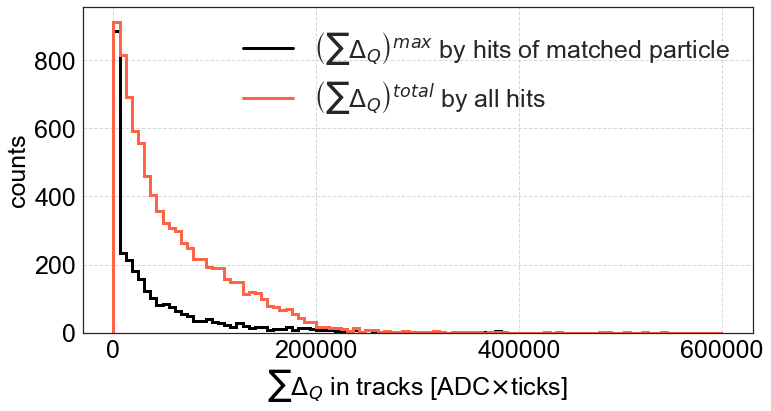

In [60]:
fig,ax=plt.subplots(figsize=(12,6))
for var,label,color in zip(['max_dQinTruthMatchedHits','dQinAllHits']
                     ,[r'$\left(\sum\Delta_Q\right)^{max}$ by hits of matched particle'
                       ,r'$\left(\sum\Delta_Q\right)^{total}$ by all hits']
                     ,['black','tomato']):
    plt.hist(overlay_tracks[var], bins=np.linspace(0,6e5,100),color=color,histtype='step',linewidth=3);
    plt.plot([0,0],[0,0],label=label,color=color,linewidth=3)
set_axes(ax,r'$\sum\Delta_Q$ in tracks [ADC$\times$ticks]','counts'
         ,xticks=np.linspace(0,6e5,4)
         ,do_add_grid=True,do_add_legend=True)

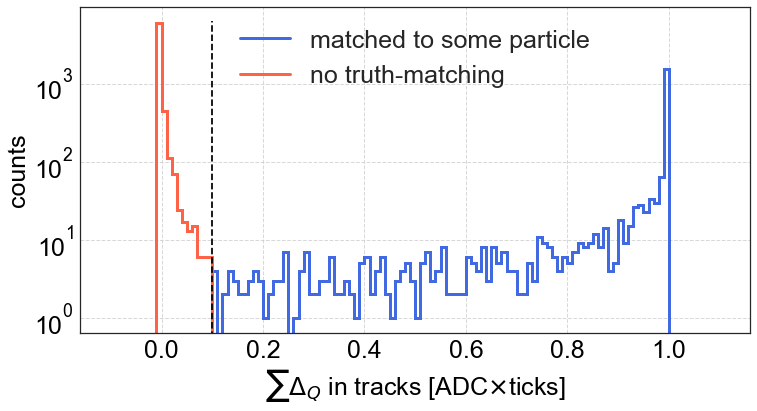

In [62]:
fig,ax=plt.subplots(figsize=(12,6))
matched_tracks = overlay_tracks[overlay_tracks.pdg!=-9999]
unmatched_tracks = overlay_tracks[overlay_tracks.pdg==-9999]
for tracks,label,color in zip([matched_tracks,unmatched_tracks]
                        ,['matched to some particle','no truth-matching']
                              ,['royalblue','tomato']):
    plt.hist(tracks['Ratio_max_dQinTruthMatchedHits_dQinAllHits'], bins=np.linspace(-0.1,1.1,121),color=color,histtype='step',linewidth=3);
    plt.plot([0,0],[0,0],label=label,color=color,linewidth=3)
plt.plot([0.1,0.1],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$\sum\Delta_Q$ in tracks [ADC$\times$ticks]','counts'
#          ,xticks=np.linspace(0,6e5,4)
         ,do_add_grid=True,do_add_legend=True,legend_loc='upper center')
ax.set_yscale('log')